#Descripcion del proyecto

Te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing.

Cuentas con:

-Registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;

-Un archivo con los pedidos en este periodo;

-Estadísticas de gastos de marketing.

#Lo que vas a investigar:

-Cómo los clientes usan el servicio;

-Cuándo empiezan a comprar;

-Cuánto dinero aporta cada cliente a la compañía;

-Cuándo los ingresos cubren el costo de adquisición de los clientes.

#1.- Imporacion y analisis de datos

In [1]:
#importamos todas las librerias a usar
from scipy import stats as st
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Importar los archivos
visit= pd.read_csv('/content/visits_log_us.csv')
orders=pd.read_csv('/content/orders_log_us.csv')
costs=pd.read_csv('/content/costs_us.csv')

In [3]:
#visualizamos los archivos vist
visit.info()
print()
visit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB



,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
#visualizamos los archivos orders
orders.info()
print()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB



,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
#visualizamos los archivos costs
costs.info()
print()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB



,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


#1. Preprocesamiento de datos

In [6]:
#creamos una funcion para resolver cualquier problema con los encabezados con el fin de preservar las reglas del buen estilo
def minimizar(dataset):
    dataset.columns=dataset.columns.str.lower().str.replace(' ', '_')
    return dataset

In [7]:
#aplicamos la funcion al dataset visit
visit= minimizar(visit)

In [8]:
#aplicamos la funcion al dataset orders
orders= minimizar(orders)

In [9]:
# revisamos valores ausentes en nuestros datos de la tabla visit
visit.isnull().count()

,0
device,359400
end_ts,359400
source_id,359400
start_ts,359400
uid,359400


In [10]:
# revisamos valores ausentes en nuestros datos de la tabla orders
orders.isnull().count()

,0
buy_ts,50415
revenue,50415
uid,50415


In [11]:
# revisamos valores ausentes en nuestros datos de la tabla costs
costs.isnull().count()

,0
source_id,2542
dt,2542
costs,2542


In [12]:
#revisamos valore duplicados en nuestros datos la tabla visit
visit.duplicated().sum()

0

In [13]:
#revisamos valore duplicados en nuestros datos la tabla orders
orders.duplicated().sum()

0

In [14]:
#revisamos valore duplicados en nuestros datos la tabla costs
costs.duplicated().sum()

0

In [15]:
#convertir las columnas end_ts y start_ts de tipo object a datetime
visit['end_ts']=pd.to_datetime(visit['end_ts'])
visit['start_ts']=pd.to_datetime(visit['start_ts'])

In [16]:
#Enriquecer los datos del dataset vist
visit['visits_day'] = visit['start_ts'].dt.date
visit['visits_week'] = visit['start_ts'].dt.isocalendar().week
visit['visits_month'] = visit['start_ts'].dt.month

In [17]:
visit.head()

,device,end_ts,source_id,start_ts,uid,visits_day,visits_week,visits_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12


In [18]:
#convertir la columna buy_ts de tipo object a datetime
orders['buy_ts']=pd.to_datetime(orders['buy_ts'])

In [19]:
#Enriquecer los datos del dataset orders
orders['buy_month'] = orders['buy_ts'].dt.to_period('M')
orders['buy_date'] = orders['buy_ts'].dt.date
orders['buy_date'] = pd.to_datetime(orders['buy_date'])

In [20]:
orders.head()

,buy_ts,revenue,uid,buy_month,buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01


In [21]:
#convertir la columna dt_ts de tipo object a datetime
costs['dt']= pd.to_datetime(costs['dt'])

In [22]:
#Enriquecer los datos del dataset costs
costs['dt_month'] = costs['dt'].dt.to_period('M')
costs['dt_date'] = costs['dt'].dt.date
costs['dt_date'] = pd.to_datetime(costs['dt_date'])

In [23]:
costs.head()

,source_id,dt,costs,dt_month,dt_date
0,1,2017-06-01,75.20,2017-06,2017-06-01
1,1,2017-06-02,62.25,2017-06,2017-06-02
2,1,2017-06-03,36.53,2017-06,2017-06-03
3,1,2017-06-04,55.00,2017-06,2017-06-04
4,1,2017-06-05,57.08,2017-06,2017-06-05


#2. Informes y calculos de metricas

Visitas

2.1.-¿Cuántas personas lo usan cada día, semana y mes?

In [24]:
#¿Cuántas personas lo usan cada día?
visit_date= visit.groupby('visits_day')['uid'].nunique()
visit_date


,uid
visits_day,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820
...,...
2018-05-27,620
2018-05-28,1039
2018-05-29,948


In [25]:
#¿Cuántas personas lo usan por semana?
visit_week= visit.groupby('visits_week')['uid'].nunique()
visit_week

,uid
visits_week,
1,6918
2,6703
3,6972
4,7060
5,8111
6,7908
7,7759
8,7518
9,7395


In [26]:
#¿Cuántas personas lo usan por mes?
visit_month= visit.groupby('visits_month')['uid'].nunique()

visit_month

,uid
visits_month,
1,28716
2,28749
3,27473
4,21008
5,20701
6,13259
7,14183
8,11631
9,18975


In [27]:
#calculamos el promedio de visitas por dia, mes y semana
print(f'El promedio de visitas por dia es: {(visit_date).mean()}')
print(f'El promedio de visitas por semana es: {(visit_week).mean()}')
print(f'El promedio de visitas por mes es: {(visit_month).mean()}')

El promedio de visitas por dia es: 907.9917582417582
El promedio de visitas por semana es: 5825.288461538462
El promedio de visitas por mes es: 23228.416666666668


2.2.-¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).


In [28]:
# nuemero de sesiones por día?
sessions_per_day= visit.groupby('visits_day').agg({'uid':['count','nunique']})
sessions_per_day.columns=['n_sessions','n_users']
sessions_per_day

,n_sessions,n_users
visits_day,,
2017-06-01,664,605
2017-06-02,658,608
2017-06-03,477,445
2017-06-04,510,476
2017-06-05,893,820
...,...,...
2018-05-27,672,620
2018-05-28,1156,1039
2018-05-29,1035,948


2.3.- Cual es la duracion de cada sesion?

In [29]:
#duración por sesión en segudos
visit['session_duration']= (visit['end_ts']-visit['start_ts']).dt.seconds
visit.head()


,device,end_ts,source_id,start_ts,uid,visits_day,visits_week,visits_month,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,0


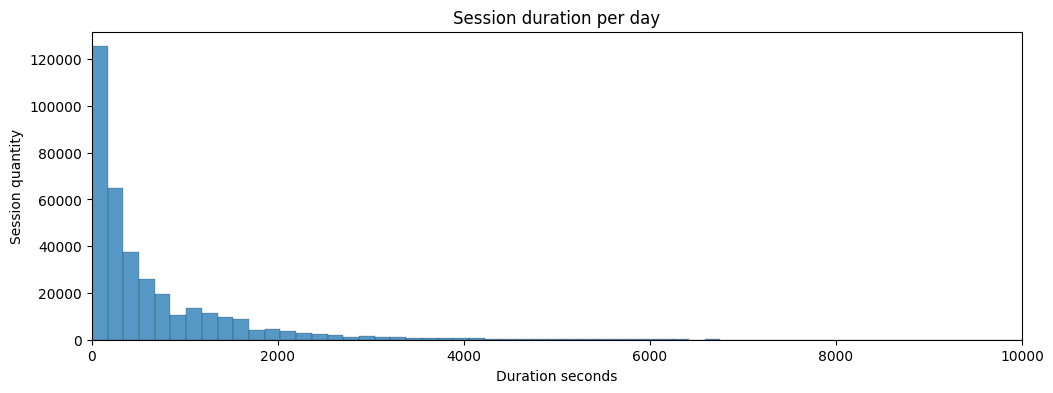

In [30]:
#por medio del grafico podemos entender de mejor manera porque hicimos el calculo
#en segundos ya que tienden a permanecer muy poco tiempo en la aplicacion
fig, ax = plt.subplots(figsize=(12, 4))

sns.histplot(data=visit['session_duration'], bins=500, ax=ax).set(
    title='Session duration per day',
    xlabel='Duration seconds',
    ylabel='Session quantity'
)
ax.set_xlim(0, 10000)
plt.show()



In [31]:
#Calcular las métricas descriptivas: media, mediana y moda, que resumen los datos y facilitan la comprensión de la información
print(f'La media de la duración de una sesión es de: {round(visit["session_duration"].mean()/60)} minutos')
print(f'La mediana de la duración de una sesión es de: {round(visit["session_duration"].median()/60)} minutos')
print(f'La moda de la duración de una sesión es de: {round(visit["session_duration"].mode()[0]/60)} minuto')

La media de la duración de una sesión es de: 11 minutos
La mediana de la duración de una sesión es de: 5 minutos
La moda de la duración de una sesión es de: 1 minuto


2.4.-Calcular la frecuancia con la que regresan los usuarios

In [32]:
#calculamos el primer ingreso de cada usuario
first_visit = visit.groupby(['uid'])['start_ts'].min().reset_index()
first_visit=first_visit.rename(columns={'start_ts':'firts_in_sessions'})
first_visit.head()

,uid,firts_in_sessions
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [33]:
# Convertir la columna 'visits_month' a datetime
visit['visits_month'] = pd.to_datetime(visit['visits_month'])

# Convertir la columna 'visits_month' a periodos mensuales
visit['visits_month'] = visit['start_ts'].dt.to_period('M')
first_visit['first_visit_session'] = first_visit['firts_in_sessions'].dt.date
first_visit['first_visit_session'] = pd.to_datetime(first_visit['first_visit_session'])
first_visit['first_session_month'] = first_visit['firts_in_sessions'].dt.to_period('M')

In [34]:
#juntamos los datasets first_visit con visit utilizando el metodo merge para enriquecer nuestros
#datos y poder realizar nuestros calculos
total_visit = first_visit.merge(visit,on='uid')
total_visit.head(2)

,uid,firts_in_sessions,first_visit_session,first_session_month,device,end_ts,source_id,start_ts,visits_day,visits_week,visits_month,session_duration
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,9,2018-03,360
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,6,2018-02,120


In [35]:
#calculamos la cantidad de visitas de los usuarios por cada mesen la columna 'visits_per_month'
total_visit['visits_per_month'] = (total_visit['visits_month'] - total_visit['first_session_month']).apply(lambda x: x.n)

total_visit.head()

,uid,firts_in_sessions,first_visit_session,first_session_month,device,end_ts,source_id,start_ts,visits_day,visits_week,visits_month,session_duration,visits_per_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,9,2018-03,360,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,6,2018-02,120,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,23,2017-06,60,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,10,2018-03,360,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,38,2017-09,1080,0


In [36]:
#esta tabla nos muestra la cantiad de visitas en el periodo de tiempo en meses
visit_cohortes = total_visit.pivot_table(
    index='first_session_month',
    columns='visits_per_month',
    values='uid',
    aggfunc='nunique'
)
visit_cohortes.fillna(' ')

visits_per_month,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


In [37]:
#en esta tabla convertimos los valores a porcentajes para poder apreciar de mejor forma los porcentajes de retencion
retention_percentage= pd.DataFrame()
for col in visit_cohortes.columns:
    retention_percentage = pd.concat([retention_percentage,visit_cohortes[col]/visit_cohortes[0]], axis=1)
retention_percentage.columns = range(12)
retention_percentage.fillna(' ')

,0,1,2,3,4,5,6,7,8,9,10,11
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02,1.0,0.05708,0.025454,0.020093,,,,,,,,
2018-03,1.0,0.041818,0.027053,,,,,,,,,


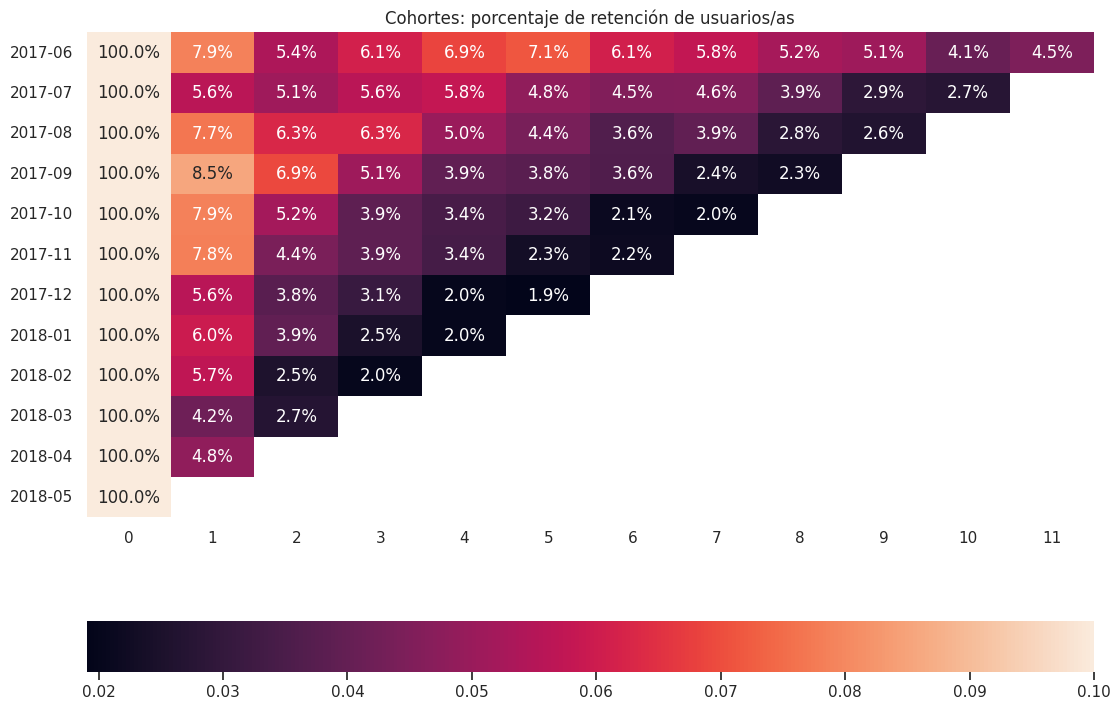

In [38]:
#Generamos un mapa de calor que nos ayuda a visualizar de mejor forma los mas altos y mas bajos periodos
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: porcentaje de retención de usuarios/as')
sns.heatmap(
    retention_percentage, annot=True, fmt='.1%',vmax=0.1,
    cbar_kws={'orientation':'horizontal'}
)
plt.show()

#Ventas

2.5 ¿Cuándo empieza la gente a comprar?

calcula el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente.



In [39]:
#calcular el primer registro por usuario
first_register = visit.groupby('uid')['visits_day'].min().reset_index()
first_register = first_register.rename(columns={'visits_day':'first_register'})
first_register['first_register']=pd.to_datetime(first_register['first_register'])
first_register.head()

,uid,first_register
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [40]:
#calculamos el registro de la primera compra por usuario
first_buy = orders.groupby('uid')['buy_date'].min().reset_index()
first_buy= first_buy.rename(columns={'buy_date':'first_buy_date'})
first_buy['first_buy_date']=pd.to_datetime(first_buy['first_buy_date'])
first_buy['first_buy_dt'] = first_buy['first_buy_date'].dt.date
first_buy['first_buy_month'] = first_buy['first_buy_date'].dt.to_period('M')
first_buy.head()

,uid,first_buy_date,first_buy_dt,first_buy_month
0,313578113262317,2018-01-03,2018-01-03,2018-01
1,1575281904278712,2017-06-03,2017-06-03,2017-06
2,2429014661409475,2017-10-11,2017-10-11,2017-10
3,2464366381792757,2018-01-28,2018-01-28,2018-01
4,2551852515556206,2017-11-24,2017-11-24,2017-11


In [41]:
#unimos los datasets first_register y first_buy con el metodo merge en la variable puchases
purchases=first_register.merge(first_buy,on='uid')
#actualizamos nuestras columnas al tipo de dato correcto
purchases['first_buy_dt']=pd.to_datetime(purchases['first_buy_dt'])
purchases.head()

,uid,first_register,first_buy_date,first_buy_dt,first_buy_month
0,313578113262317,2017-09-18,2018-01-03,2018-01-03,2018-01
1,1575281904278712,2017-06-03,2017-06-03,2017-06-03,2017-06
2,2429014661409475,2017-10-11,2017-10-11,2017-10-11,2017-10
3,2464366381792757,2018-01-27,2018-01-28,2018-01-28,2018-01
4,2551852515556206,2017-11-24,2017-11-24,2017-11-24,2017-11


In [42]:
purchases['first_purchse_dt'] = (purchases['first_buy_date'] - purchases['first_register']).dt.days

purchases.head()

,uid,first_register,first_buy_date,first_buy_dt,first_buy_month,first_purchse_dt
0,313578113262317,2017-09-18,2018-01-03,2018-01-03,2018-01,107
1,1575281904278712,2017-06-03,2017-06-03,2017-06-03,2017-06,0
2,2429014661409475,2017-10-11,2017-10-11,2017-10-11,2017-10,0
3,2464366381792757,2018-01-27,2018-01-28,2018-01-28,2018-01,1
4,2551852515556206,2017-11-24,2017-11-24,2017-11-24,2017-11,0


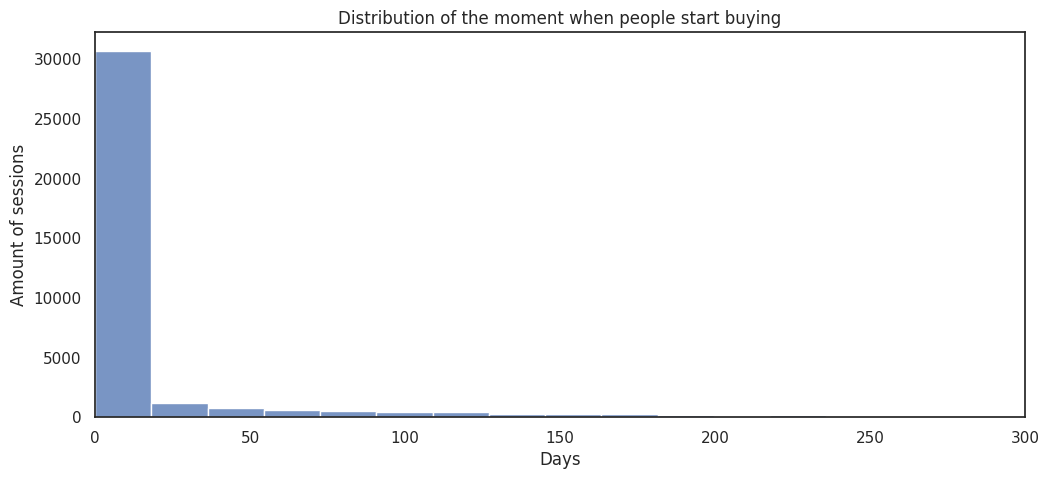

In [43]:
#creamos un grafico de tipo histograma para comprender de mejor manera la
#distribucion de los dias transcurridos para que un usuario se convierta en cliente
fig = plt.subplots(figsize=(12, 5))

sns.histplot(data=purchases['first_purchse_dt']
             , bins=20).set(title='Distribution of the moment when people start buying',
     xlabel='Days', ylabel='Amount of sessions')
plt.xlim(0, 300)
plt.show()

La mayoria de usuarios se convierten en clientes el mismo dia que se registran en la aplicaion, esto puede deberse al interes que tienen por conseguir una entrada lo antes posible cuando se enteran que los boletos de cierto evento se venden y nuestra aplicacion

2.6.- Cuántos pedidos hacen durante un período de tiempo dado?

In [44]:
#calculamos el numero de pedidos por mes
purchases_per_month = orders.groupby('buy_month')['uid'].count().reset_index()
purchases_per_month = purchases_per_month.rename(columns={'uid':'purchases_per_month'})
purchases_per_month

,buy_month,purchases_per_month
0,2017-06,2354
1,2017-07,2363
2,2017-08,1807
3,2017-09,3387
4,2017-10,5679
5,2017-11,5659
6,2017-12,6218
7,2018-01,4721
8,2018-02,5281
9,2018-03,5326


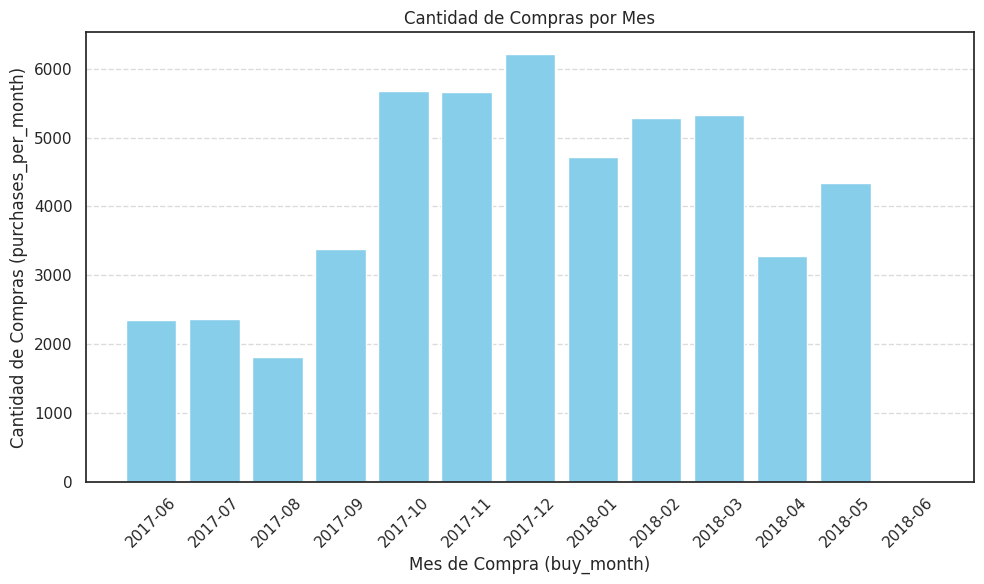

In [45]:
#agregamos un histograma para entender mejor la distribucion de pedidos que se realizan cada mes
#asi como cuales son los meses mas altos y mas bajos en ventas

# Convertimos buy_month a tipo categórico
purchases_per_month['buy_month'] = purchases_per_month['buy_month'].astype(str)
purchases_per_month['buy_month'] = pd.Categorical(
    purchases_per_month['buy_month'],
    categories=sorted(purchases_per_month['buy_month'].unique()),
    ordered=True
)

plt.figure(figsize=(10, 6))
plt.bar(purchases_per_month['buy_month'], purchases_per_month['purchases_per_month'], color='skyblue')
plt.xlabel('Mes de Compra (buy_month)')
plt.ylabel('Cantidad de Compras (purchases_per_month)')
plt.title('Cantidad de Compras por Mes')
plt.xticks(rotation=45)  # Gira las etiquetas del eje X para mayor claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Dentro de este periodo podemos observar que los mejores meses estan dentro del rango de octubre a febrero, es un dato talvez un poco logico ya que hay una gran cantidad de eventos que suceden antes durante y despues de navidad, estas fechs son claves para el consumo de las personas.

2.7 Cuál es el tamaño promedio de compra?

In [46]:
#calculamos el promedio de ventas por mes
revenue_per_month = orders.groupby('buy_month')['revenue'].mean().reset_index()
revenue_per_month= revenue_per_month.rename(columns={'revenue':'avg_revenue_per_month'})
revenue_per_month

,buy_month,avg_revenue_per_month
0,2017-06,4.060106
1,2017-07,5.306589
2,2017-08,4.847139
3,2017-09,5.416448
4,2017-10,4.928280
5,2017-11,4.783518
6,2017-12,5.852139
7,2018-01,4.112927
8,2018-02,4.840095
9,2018-03,5.413930


In [47]:
total_avg_revenue= orders['revenue'].mean().round(4)
print('El tamaño promedio de compra es: ' +str(total_avg_revenue))

El tamaño promedio de compra es: 4.9996


2.8.- Cuánto dinero traen? (LTV)

In [48]:
#calculamos la primera compra del mes
first_order_per_month = orders.groupby('uid')['buy_month'].min().reset_index()
first_order_per_month=first_order_per_month.rename(columns={'buy_month':'first_buy_month'})
first_order_per_month.head()

,uid,first_buy_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


In [49]:
#calculamos la  cantidad de personas que hicieron su primer pedido durante el mes
cohort= first_order_per_month.groupby('first_buy_month')['uid'].nunique().reset_index()
cohort=cohort.rename(columns={'uid':'n_buyers'})
cohort.head()

,first_buy_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [50]:
#juntamos los datasets purchse_ltv y orders para poder realizar nuestros calculos
purchse_ltv=orders.merge(first_order_per_month,on='uid')
purchse_ltv.head()

,buy_ts,revenue,uid,buy_month,buy_date,first_buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01,2017-06


In [51]:
#calculamos las ganancias totales por mes
cohorts_ltv = (purchse_ltv.groupby(['first_buy_month','buy_month']).agg({'revenue':'sum'}).reset_index())
cohorts_ltv.head()

,first_buy_month,buy_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58


In [52]:
#juntamos los datasets cohort y cohorts_ltv para realizar nuestros calculos
report=cohort.merge(cohorts_ltv,on='first_buy_month')
report.head()

,first_buy_month,n_buyers,buy_month,revenue
0,2017-06,2023,2017-06,9557.49
1,2017-06,2023,2017-07,981.82
2,2017-06,2023,2017-08,885.34
3,2017-06,2023,2017-09,1931.30
4,2017-06,2023,2017-10,2068.58


In [53]:
#calcular la edad de cada cohort
report['age_per_month'] = (report['buy_month'] - report['first_buy_month']).apply(lambda x: x.n)
report.head()

,first_buy_month,n_buyers,buy_month,revenue,age_per_month
0,2017-06,2023,2017-06,9557.49,0
1,2017-06,2023,2017-07,981.82,1
2,2017-06,2023,2017-08,885.34,2
3,2017-06,2023,2017-09,1931.30,3
4,2017-06,2023,2017-10,2068.58,4


In [54]:
#calcular el ltv para cada una de las cohorts
report['ltv'] = report['revenue'] / report['n_buyers']
report.head()

,first_buy_month,n_buyers,buy_month,revenue,age_per_month,ltv
0,2017-06,2023,2017-06,9557.49,0,4.724414
1,2017-06,2023,2017-07,981.82,1,0.485329
2,2017-06,2023,2017-08,885.34,2,0.437637
3,2017-06,2023,2017-09,1931.30,3,0.954671
4,2017-06,2023,2017-10,2068.58,4,1.022531


In [55]:
#generamos una pivot_table
output = report.pivot_table(
    index='first_buy_month',
    columns='age_per_month',
    values='ltv',
    aggfunc='sum').cumsum(axis=1).round(2)

output.fillna('')

age_per_month,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02,4.16,4.44,4.51,4.59,,,,,,,,


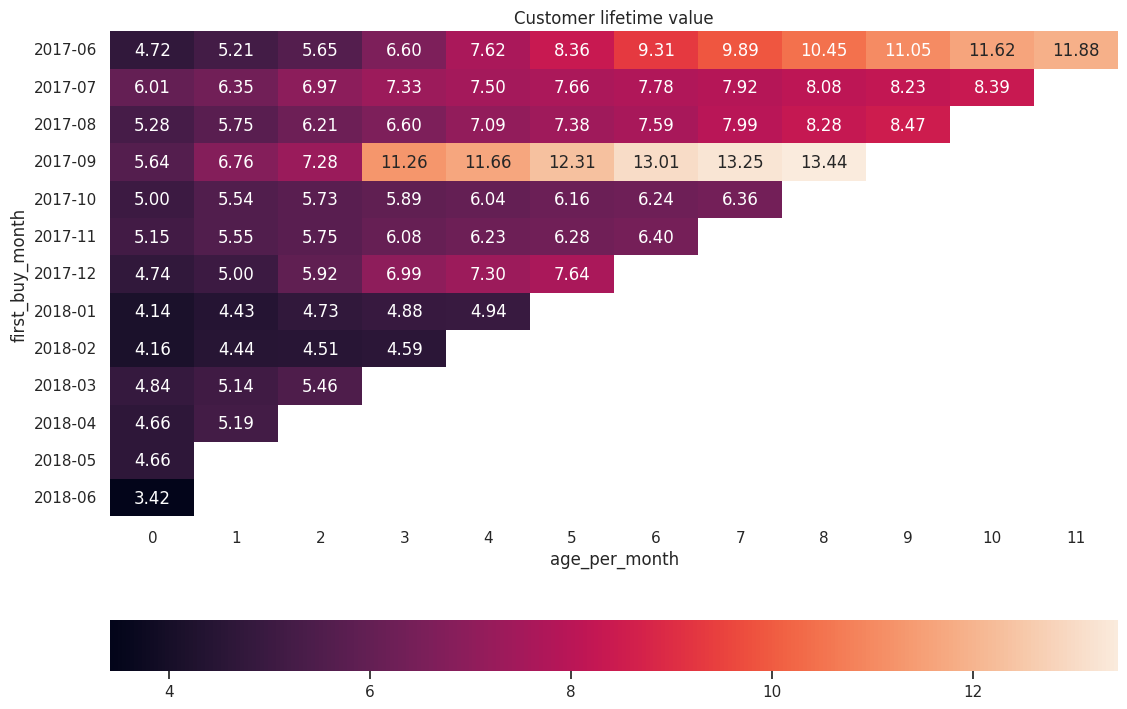

In [56]:
#generamos un mapa de calor

fig = plt.subplots(figsize=(13, 9))

sns.heatmap(output, annot=True, fmt='.2f', cbar_kws={'orientation':'horizontal'}).set(title='Customer lifetime value')
plt.show()

Al evaluar el LTV encontramos que se encuentra en crecimiento, lo cual nos indica que los clientes estan coontentos con la aplicacion y que la mayoria lo esta usando mas de una vez esto es un buen indicativo ya que pdemos decir que la empresa esta generando lealtad de parte de sus clientes que podria convertirse en ganancias.

In [57]:
#calcular el ltv de todo el periodo
ltv_average = output.mean(axis=0)[11]
ltv_average

11.88

#Marketing

2.8.- Cuánto dinero se gastó?

-Calcula el total por fuente de adquisición

-Calcula el total a lo largo del tiempo

In [58]:
#calculamos el gasto total en marketing
print('El total de dinero gastado en marketing es: '+str(costs['costs'].sum()))

El total de dinero gastado en marketing es: 329131.62


In [59]:
#calculamos costo total por cada una de las funtes de adquisicion
costs_per_source_id=costs.groupby('source_id')['costs'].sum().reset_index()
costs_per_source_id

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [60]:
#calcular el costo total a lo largo del tiempo
costs_per_month=costs.groupby('dt_month')['costs'].sum().reset_index()
costs_per_month

,dt_month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


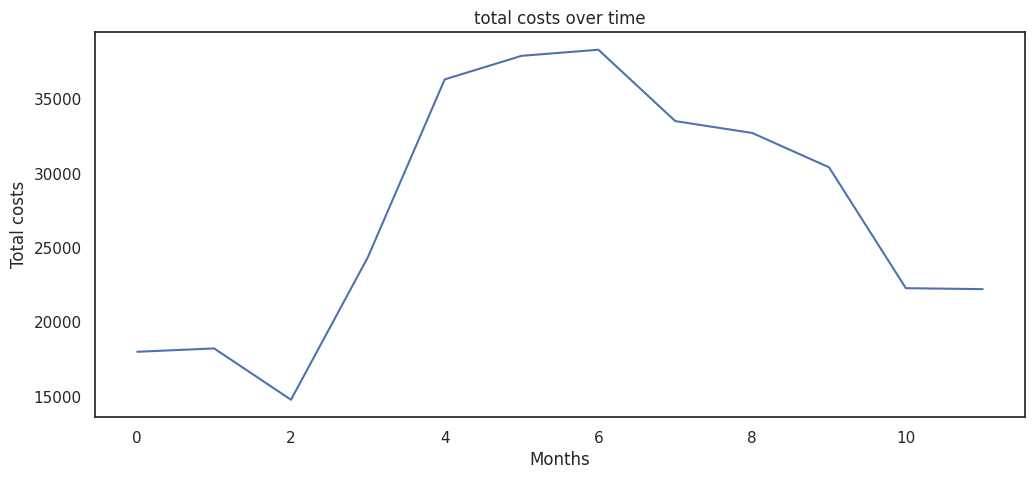

In [61]:
fig = plt.subplots(figsize=(12, 5))

sns.lineplot(data=costs_per_month['costs']).set(title='total costs over time',
     xlabel='Months', ylabel='Total costs')
plt.show()

Despues de analizar el costo total a lo largo de tiempo y comparar con los ingreso a lo largo del tiempo y encontramos que hay una relacion muy estrecha entre ambos lo que quiere decir que los meses que mas se han invertido en marketing mas ingresos han generado, esto no siginfica que estos ingresos sean ganancias como analizaremos a continuacion.

2.9.- Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [62]:
#ordenamos los datos y agrupamos por la columna 'uid'
clients=total_visit.sort_values('firts_in_sessions').groupby('uid').first()
clients= clients[['source_id']]
clients.head()

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


In [63]:
#unimos los datasets purchases y clients
report_cac = purchases.merge(clients,left_on='uid',right_index= True)
report_cac.head()

,uid,first_register,first_buy_date,first_buy_dt,first_buy_month,first_purchse_dt,source_id
0,313578113262317,2017-09-18,2018-01-03,2018-01-03,2018-01,107,2
1,1575281904278712,2017-06-03,2017-06-03,2017-06-03,2017-06,0,10
2,2429014661409475,2017-10-11,2017-10-11,2017-10-11,2017-10,0,3
3,2464366381792757,2018-01-27,2018-01-28,2018-01-28,2018-01,1,5
4,2551852515556206,2017-11-24,2017-11-24,2017-11-24,2017-11,0,5


In [64]:
#calculamos el numero de clientes por fecha
purchases_days=report_cac.groupby(['source_id','first_buy_date'])['uid'].count().reset_index()
purchases_days= purchases_days.rename(columns ={'uid':'num_buyers'})
purchases_days

,source_id,first_buy_date,num_buyers
0,1,2017-06-01,15
1,1,2017-06-02,11
2,1,2017-06-03,7
3,1,2017-06-04,4
4,1,2017-06-05,14
...,...,...,...
2458,10,2018-05-27,2
2459,10,2018-05-28,9
2460,10,2018-05-29,6
2461,10,2018-05-30,5


In [65]:
#realizamos una union de nuestras tablas purchases_days y costs para agregar el numero de clientes por fecha
final_costs_cac = pd.merge(purchases_days, costs, left_on=['source_id', 'first_buy_date'], right_on=['source_id', 'dt'])
final_costs_cac.head()

,source_id,first_buy_date,num_buyers,dt,costs,dt_month,dt_date
0,1,2017-06-01,15,2017-06-01,75.20,2017-06,2017-06-01
1,1,2017-06-02,11,2017-06-02,62.25,2017-06,2017-06-02
2,1,2017-06-03,7,2017-06-03,36.53,2017-06,2017-06-03
3,1,2017-06-04,4,2017-06-04,55.00,2017-06,2017-06-04
4,1,2017-06-05,14,2017-06-05,57.08,2017-06,2017-06-05


In [66]:
#calculamos el costo de adquisicion por cliente
final_costs_cac['cac']=final_costs_cac['costs']/final_costs_cac['num_buyers']
final_costs_cac.sample(10)

,source_id,first_buy_date,num_buyers,dt,costs,dt_month,dt_date,cac
1667,5,2018-01-05,17,2018-01-05,163.93,2018-01,2018-01-05,9.642941
1817,9,2017-06-06,3,2017-06-06,10.52,2017-06,2017-06-06,3.506667
1112,4,2017-06-26,11,2017-06-26,45.00,2017-06,2017-06-26,4.090909
714,2,2018-05-22,8,2018-05-22,103.77,2018-05,2018-05-22,12.971250
2057,9,2018-02-14,6,2018-02-14,19.46,2018-02,2018-02-14,3.243333
931,3,2017-12-25,39,2017-12-25,497.03,2017-12,2017-12-25,12.744359
1723,5,2018-03-02,17,2018-03-02,176.96,2018-03,2018-03-02,10.409412
2384,10,2018-03-06,1,2018-03-06,20.18,2018-03,2018-03-06,20.180000
312,1,2018-04-13,9,2018-04-13,61.05,2018-04,2018-04-13,6.783333
2141,9,2018-05-26,2,2018-05-26,8.53,2018-05,2018-05-26,4.265000


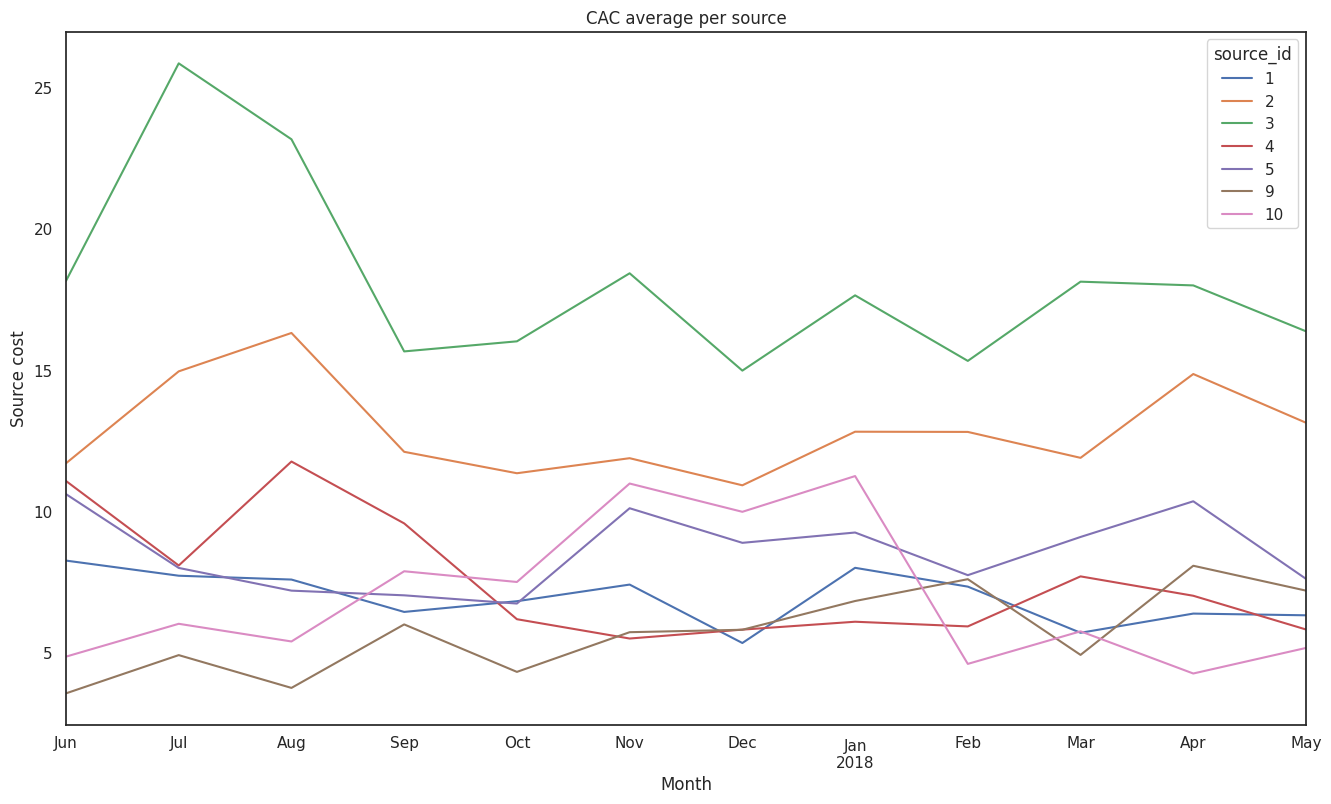

In [67]:
final_costs_cac.pivot_table(index='dt_month', columns='source_id', values='cac',
                        aggfunc='mean').plot(figsize=(16,9), title='CAC average per source',
                                             xlabel = 'Month', ylabel = 'Source cost')
plt.show()


2.10 .- Cuán rentables eran las inversiones? (ROMI)

In [68]:
# Realizar el merge y seleccionar columnas que vamos a necesitar para nuestros calculos
report_romi = pd.merge(report,final_costs_cac[['source_id','dt_month','cac']], left_on='first_buy_month', right_on='dt_month', how='inner')

report_romi.head()


,first_buy_month,n_buyers,buy_month,revenue,age_per_month,ltv,source_id,dt_month,cac
0,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.013333
1,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.659091
2,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.218571
3,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,13.750000
4,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,4.077143


In [69]:
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
report_romi.head()

,first_buy_month,n_buyers,buy_month,revenue,age_per_month,ltv,source_id,dt_month,cac,romi
0,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.013333,0.942370
1,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.659091,0.834836
2,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.218571,0.905308
3,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,13.750000,0.343594
4,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,4.077143,1.158756


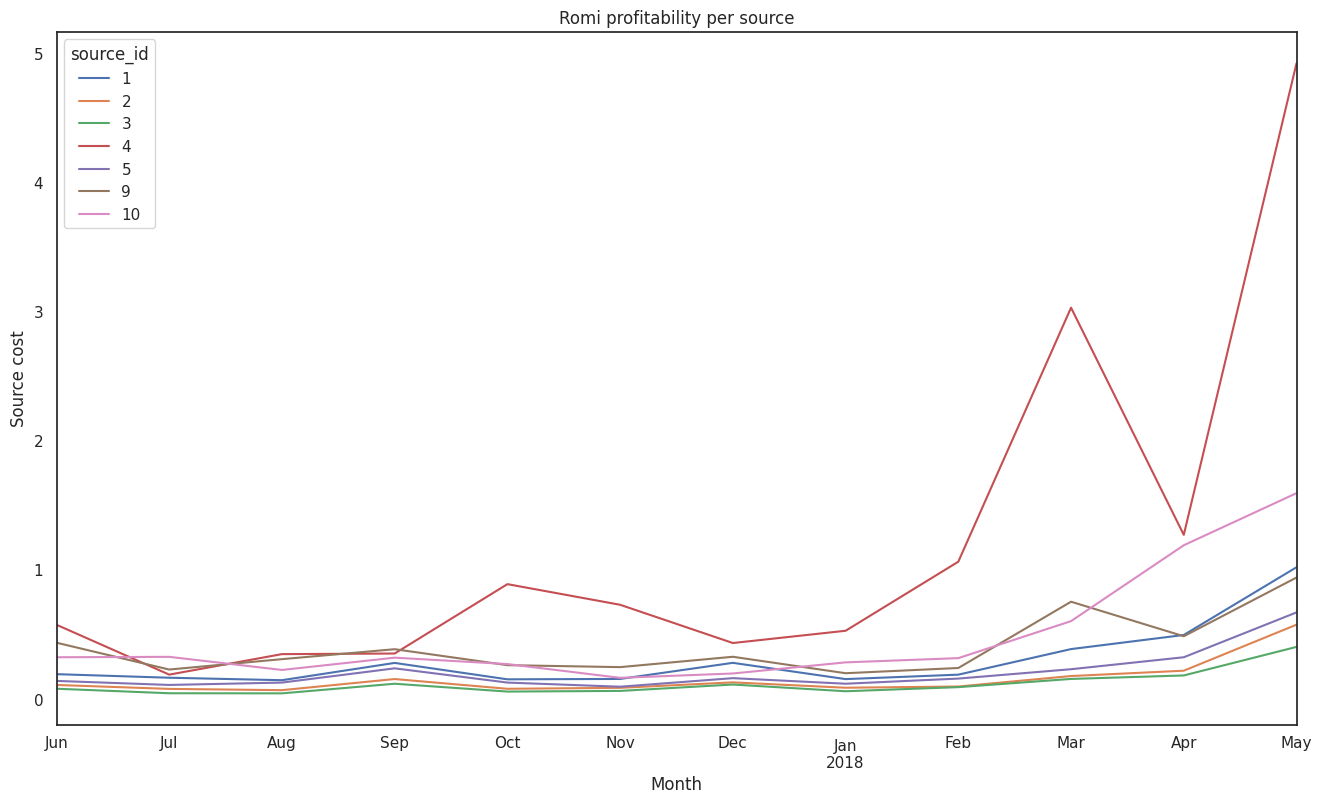

In [70]:
report_romi.pivot_table(index='dt_month', columns='source_id', values='romi',
                        aggfunc='mean').plot(figsize=(16,9), title='Romi profitability per source',
                                             xlabel = 'Month', ylabel = 'Source cost')
plt.show()

#Concluciones generales



Primero que todo nos llamo la atencion la tasa de retencion y el LTV donde realizamos una comparación entre ellas y pudimos sacar algunas conclusiones interesantes:

-La tasa de retencion se encuentra decreciendo lo cual hasta cierto punto es normal mientras que el LTV esta en crecimiento y esto podria deberse a algunos factores.

-Aunque la tasa de retención está disminuyendo, los nuevos clientes que se están adquiriendo tienen un valor significativamente mayor. Esto podría deberse a que estos clientes hacen compras de mayor valor o compran con mayor frecuencia durante su vida como clientes.

-La empresa puede estar segmentando mejor su mercado y enfocándose en adquirir clientes que, aunque tengan una menor tasa de retención, tienen un mayor valor en términos de ingresos generados.

-La empresa podría haber mejorado sus estrategias de precios y monetización, logrando extraer más valor de los clientes existentes a pesar de una menor retención.

-Campañas de marketing que están atrayendo a clientes de alto valor, incluso si esos clientes no permanecen leales por mucho tiempo también podrían resultar en un LTV creciente.

Luego Al ver los resultados del CAC nos refleja que en varias fuentes sus valores se alejan en medidas considerables de 0 lo cual nos puede sugerir que las estrategias de marketing y ventas no son tan eficientes como deberian, y mientras mas se alejen mas podria reducir el margen de ganancia de cada cliente adquirido.

Al finalizar calculamos el romi de cada una de las fuentes en donde detectamos que en su mayoria es menor a cero lo cual nos indica que que la inversión en marketing está generando una pérdida en lugar de una ganancia. Básicamente, esto significa que los ingresos atribuidos a la campaña de marketing no son suficientes para cubrir los costos de la mayoria de campañas

como recomendacion diriamos que las fuentes 1 y 4 se encuentran acercandose a cero en sus valores CAC y separandose de cero en sus valores ROMI por lo que concideramos que serian dos fuentes a tener en cuenta para trabajar y mejorar de cara a obtener mejores resultados en cuanto a ganancias para la empresa.